***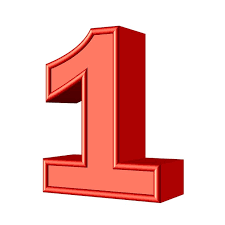***   **WINE**

#Import required modules

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

#Load Dataset

In [4]:
wine = datasets.load_wine() # it's source is same as : https://archive.ics.uci.edu/ml/datasets/wine

In [5]:
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [6]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
print(wine.feature_names)
print(wine.target_names)
print(wine.target)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [9]:
df["target"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

#DataFrame ready to perform

In [11]:
len(df)

178

In [12]:
X = df.drop(["target"], axis="columns")
y = df.target
print(X.head())
print(y.head())

   alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0    14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1    13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2    13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3    14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4    13.24        2.59  2.87  ...  1.04                          2.93    735.0

[5 rows x 13 columns]
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


#SVC Classfier

##Linear SVC Classifier



In [13]:
linear_SVC_classifier = SVC(kernel='linear')
linear_SVC_classifier

SVC(kernel='linear')

###train size : test size = 70% : 30%


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [15]:
print(len(X_train))
print(len(y_test))

124
54


In [16]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 98.14814814814815%

Confusion Matrix:

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        22
           2       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



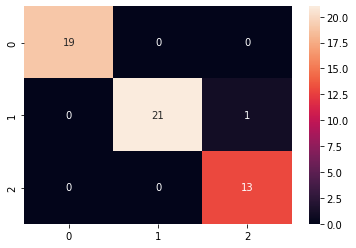

In [18]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [20]:
print(len(X_train))
print(len(y_test))

106
72


In [21]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [22]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.83333333333334%

Confusion Matrix:
[[22  0  0]
 [ 0 28  3]
 [ 0  0 19]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.90      0.95        31
           2       0.86      1.00      0.93        19

    accuracy                           0.96        72
   macro avg       0.95      0.97      0.96        72
weighted avg       0.96      0.96      0.96        72



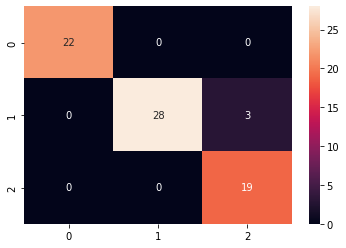

In [23]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [25]:
print(len(X_train))
print(len(y_test))

89
89


In [26]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [27]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 92.13483146067416%

Confusion Matrix:
[[25  0  0]
 [ 3 34  3]
 [ 1  0 23]]

Classification Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.85      0.92        40
           2       0.88      0.96      0.92        24

    accuracy                           0.92        89
   macro avg       0.92      0.94      0.92        89
weighted avg       0.93      0.92      0.92        89



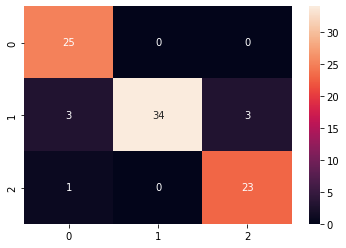

In [28]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [30]:
print(len(X_train))
print(len(y_test))

71
107


In [31]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 88.78504672897196%

Confusion Matrix:

[[34  0  0]
 [ 4 38  4]
 [ 4  0 23]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        34
           1       1.00      0.83      0.90        46
           2       0.85      0.85      0.85        27

    accuracy                           0.89       107
   macro avg       0.89      0.89      0.88       107
weighted avg       0.90      0.89      0.89       107



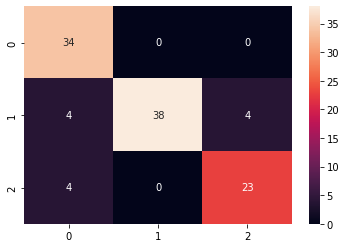

In [33]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [35]:
print(len(X_train))
print(len(y_test))

53
125


In [36]:
linear_SVC_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
y_pred = linear_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 88.0%

Confusion Matrix:

[[41  1  0]
 [ 5 44  3]
 [ 5  1 25]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.98      0.88        42
           1       0.96      0.85      0.90        52
           2       0.89      0.81      0.85        31

    accuracy                           0.88       125
   macro avg       0.88      0.88      0.88       125
weighted avg       0.89      0.88      0.88       125



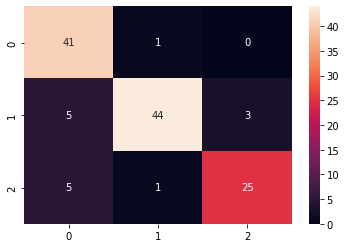

In [38]:
sns.heatmap(cf_matrix, annot=True)

##Polynomial SVC Classifier

In [39]:
poly_SVC_classifier = SVC(kernel='poly')
poly_SVC_classifier

SVC(kernel='poly')

###train size : test size = 70% : 30%

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
print(len(X_train))
print(len(y_test))

124
54


In [42]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [43]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 74.07407407407408%

Confusion Matrix:
 [[15  1  3]
 [ 1 21  0]
 [ 0  9  4]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.68      0.95      0.79        22
           2       0.57      0.31      0.40        13

    accuracy                           0.74        54
   macro avg       0.73      0.68      0.68        54
weighted avg       0.74      0.74      0.72        54



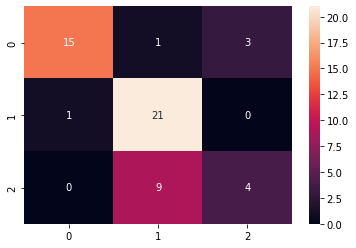

In [44]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [46]:
print(len(X_train))
print(len(y_test))

106
72


In [47]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [48]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 65.27777777777779%

Confusion Matrix:
 [[18  4  0]
 [ 2 29  0]
 [ 0 19  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.56      0.94      0.70        31
           2       0.00      0.00      0.00        19

    accuracy                           0.65        72
   macro avg       0.49      0.58      0.52        72
weighted avg       0.52      0.65      0.56        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


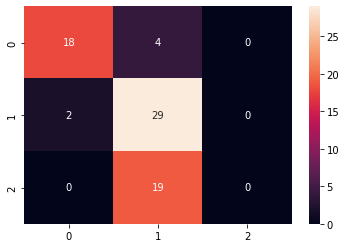

In [49]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [51]:
print(len(X_train))
print(len(y_test))

89
89


In [52]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [53]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 70.78651685393258%

Confusion Matrix:
 [[22  1  2]
 [ 3 37  0]
 [ 3 17  4]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.67      0.93      0.78        40
           2       0.67      0.17      0.27        24

    accuracy                           0.71        89
   macro avg       0.71      0.66      0.63        89
weighted avg       0.70      0.71      0.66        89



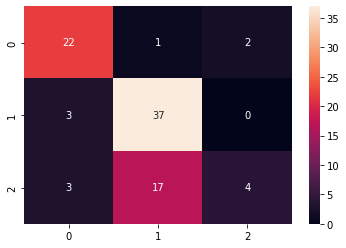

In [54]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [56]:
print(len(X_train))
print(len(y_test))

71
107


In [57]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [58]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 70.09345794392523%

Confusion Matrix:
 [[30  1  3]
 [ 3 41  2]
 [ 4 19  4]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        34
           1       0.67      0.89      0.77        46
           2       0.44      0.15      0.22        27

    accuracy                           0.70       107
   macro avg       0.64      0.64      0.61       107
weighted avg       0.66      0.70      0.65       107



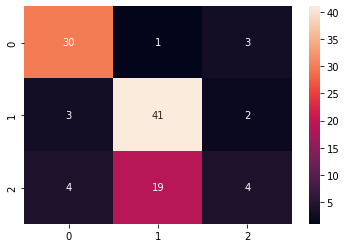

In [59]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [61]:
print(len(X_train))
print(len(y_test))

53
125


In [62]:
poly_SVC_classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [63]:
y_pred = poly_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 70.39999999999999%

Confusion Matrix:
 [[38  1  3]
 [ 3 45  4]
 [ 4 22  5]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.66      0.87      0.75        52
           2       0.42      0.16      0.23        31

    accuracy                           0.70       125
   macro avg       0.64      0.64      0.62       125
weighted avg       0.66      0.70      0.66       125



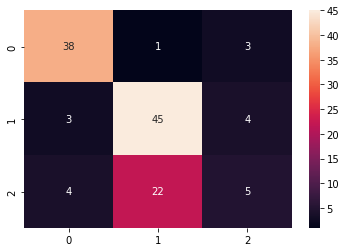

In [64]:
sns.heatmap(cf_matrix, annot=True)

##Gaussain SVC Classifier

In [65]:
gaussain_SVC_classifier = SVC(kernel='rbf')
gaussain_SVC_classifier

SVC()

###train size : test size = 70% : 30%

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
print(len(X_train))
print(len(y_test))

124
54


In [68]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC()

In [69]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 77.77777777777779%

Confusion Matrix:
 [[17  0  2]
 [ 1 20  1]
 [ 1  7  5]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.74      0.91      0.82        22
           2       0.62      0.38      0.48        13

    accuracy                           0.78        54
   macro avg       0.75      0.73      0.73        54
weighted avg       0.77      0.78      0.76        54



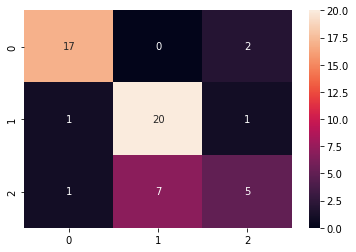

In [70]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [72]:
print(len(X_train))
print(len(y_test))

106
72


In [73]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC()

In [74]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 68.05555555555556%

Confusion Matrix:
 [[20  2  0]
 [ 2 29  0]
 [ 3 16  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.62      0.94      0.74        31
           2       0.00      0.00      0.00        19

    accuracy                           0.68        72
   macro avg       0.47      0.61      0.53        72
weighted avg       0.51      0.68      0.58        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


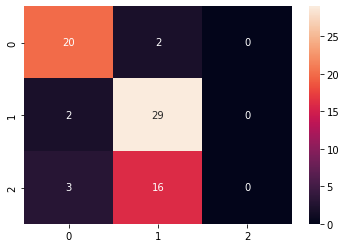

In [75]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [77]:
print(len(X_train))
print(len(y_test))

89
89


In [78]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC()

In [79]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 67.41573033707866%

Confusion Matrix:
 [[22  2  1]
 [ 3 37  0]
 [ 3 20  1]]

Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        25
           1       0.63      0.93      0.75        40
           2       0.50      0.04      0.08        24

    accuracy                           0.67        89
   macro avg       0.64      0.62      0.55        89
weighted avg       0.64      0.67      0.59        89



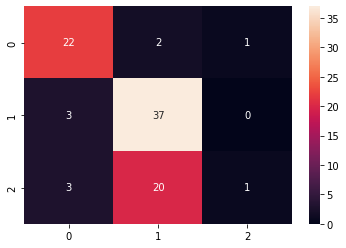

In [80]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [82]:
print(len(X_train))
print(len(y_test))

71
107


In [83]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC()

In [84]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 71.96261682242991%

Confusion Matrix:
 [[30  0  4]
 [ 3 36  7]
 [ 4 12 11]]

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        34
           1       0.75      0.78      0.77        46
           2       0.50      0.41      0.45        27

    accuracy                           0.72       107
   macro avg       0.69      0.69      0.69       107
weighted avg       0.71      0.72      0.71       107



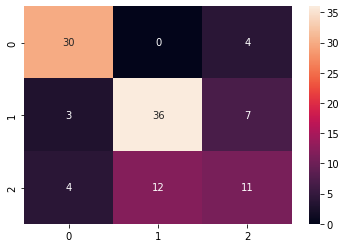

In [85]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [87]:
print(len(X_train))
print(len(y_test))

53
125


In [88]:
gaussain_SVC_classifier.fit(X_train, y_train)

SVC()

In [89]:
y_pred = gaussain_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 72.0%

Confusion Matrix:
 [[38  0  4]
 [ 3 36 13]
 [ 4 11 16]]

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.77      0.69      0.73        52
           2       0.48      0.52      0.50        31

    accuracy                           0.72       125
   macro avg       0.70      0.70      0.70       125
weighted avg       0.72      0.72      0.72       125



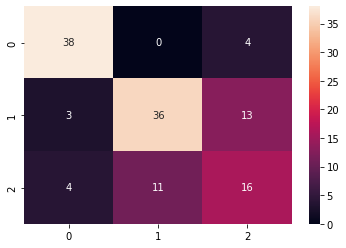

In [90]:
sns.heatmap(cf_matrix, annot=True)

##Sigmoid SVC Classifier

In [91]:
sigmoid_SVC_classifier = SVC(kernel='sigmoid')
sigmoid_SVC_classifier

SVC(kernel='sigmoid')

###train size : test size = 70% : 30%

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [93]:
print(len(X_train))
print(len(y_test))

124
54


In [94]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [95]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 20.37037037037037%

Confusion Matrix:
 [[ 0 19  0]
 [11 11  0]
 [ 8  5  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.31      0.50      0.39        22
           2       0.00      0.00      0.00        13

    accuracy                           0.20        54
   macro avg       0.10      0.17      0.13        54
weighted avg       0.13      0.20      0.16        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


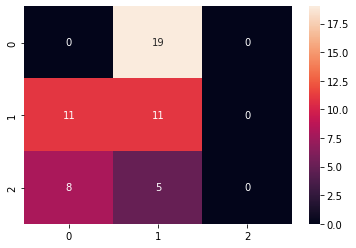

In [96]:
sns.heatmap(cf_matrix, annot=True)

### train size : test size = 60% : 40%



In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [98]:
print(len(X_train))
print(len(y_test))

106
72


In [99]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [100]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 18.055555555555554%

Confusion Matrix:
 [[ 2 20  0]
 [20 11  0]
 [15  4  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.05      0.09      0.07        22
           1       0.31      0.35      0.33        31
           2       0.00      0.00      0.00        19

    accuracy                           0.18        72
   macro avg       0.12      0.15      0.13        72
weighted avg       0.15      0.18      0.16        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


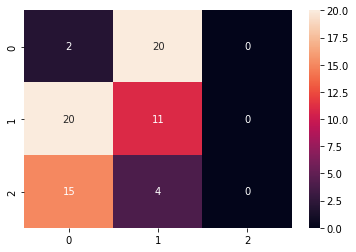

In [101]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [103]:
print(len(X_train))
print(len(y_test))

89
89


In [104]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [105]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 17.97752808988764%

Confusion Matrix:
 [[ 7 18  0]
 [31  9  0]
 [24  0  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.11      0.28      0.16        25
           1       0.33      0.23      0.27        40
           2       0.00      0.00      0.00        24

    accuracy                           0.18        89
   macro avg       0.15      0.17      0.14        89
weighted avg       0.18      0.18      0.17        89



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


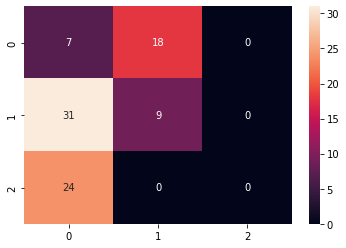

In [106]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [108]:
print(len(X_train))
print(len(y_test))

71
107


In [109]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [110]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 15.887850467289718%

Confusion Matrix:
 [[ 7 27  0]
 [36 10  0]
 [27  0  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.10      0.21      0.13        34
           1       0.27      0.22      0.24        46
           2       0.00      0.00      0.00        27

    accuracy                           0.16       107
   macro avg       0.12      0.14      0.13       107
weighted avg       0.15      0.16      0.15       107



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


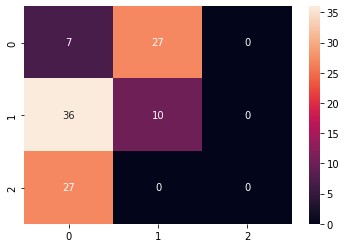

In [111]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [113]:
print(len(X_train))
print(len(y_test))

53
125


In [114]:
sigmoid_SVC_classifier.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [115]:
y_pred = sigmoid_SVC_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 41.6%

Confusion Matrix:
 [[ 0 42  0]
 [ 0 52  0]
 [ 0 31  0]]

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.42      1.00      0.59        52
           2       0.00      0.00      0.00        31

    accuracy                           0.42       125
   macro avg       0.14      0.33      0.20       125
weighted avg       0.17      0.42      0.24       125



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


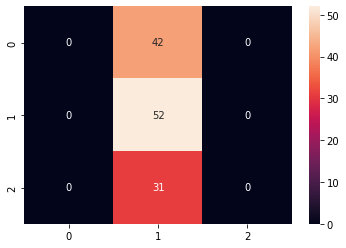

In [116]:
sns.heatmap(cf_matrix, annot=True)

#Decision Tree

In [170]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

###train size : test size = 70% : 30%


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [172]:
print(len(X_train))
print(len(y_test))

124
54


In [173]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [174]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 92.5925925925926%

Confusion Matrix:

[[17  2  0]
 [ 1 20  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.91      0.91      0.91        22
           2       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54



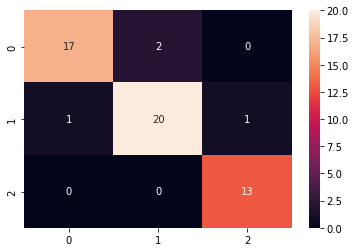

In [175]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [177]:
print(len(X_train))
print(len(y_test))

106
72


In [178]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [179]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 91.66666666666666%

Confusion Matrix:
[[22  0  0]
 [ 1 28  2]
 [ 0  3 16]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       0.90      0.90      0.90        31
           2       0.89      0.84      0.86        19

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72



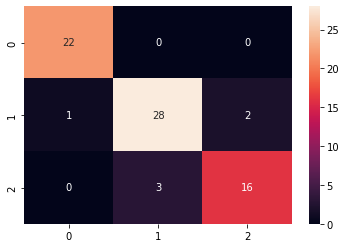

In [180]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [182]:
print(len(X_train))
print(len(y_test))

89
89


In [183]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [184]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 87.64044943820225%

Confusion Matrix:
[[23  2  0]
 [ 3 31  6]
 [ 0  0 24]]

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.94      0.78      0.85        40
           2       0.80      1.00      0.89        24

    accuracy                           0.88        89
   macro avg       0.87      0.90      0.88        89
weighted avg       0.89      0.88      0.87        89



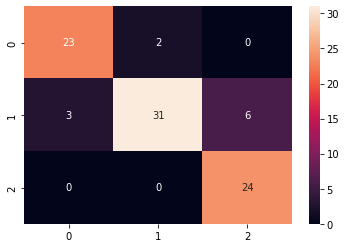

In [185]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [187]:
print(len(X_train))
print(len(y_test))

71
107


In [188]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [189]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 89.7196261682243%

Confusion Matrix:

[[32  0  2]
 [ 3 40  3]
 [ 0  3 24]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.93      0.87      0.90        46
           2       0.83      0.89      0.86        27

    accuracy                           0.90       107
   macro avg       0.89      0.90      0.89       107
weighted avg       0.90      0.90      0.90       107



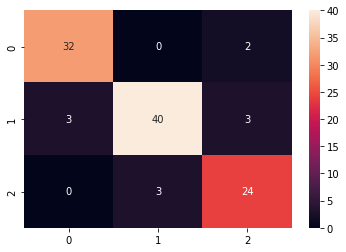

In [190]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [192]:
print(len(X_train))
print(len(y_test))

53
125


In [193]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [194]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.60000000000001%

Confusion Matrix:

[[40  2  0]
 [ 4 46  2]
 [ 0  0 31]]

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.96      0.88      0.92        52
           2       0.94      1.00      0.97        31

    accuracy                           0.94       125
   macro avg       0.94      0.95      0.94       125
weighted avg       0.94      0.94      0.94       125



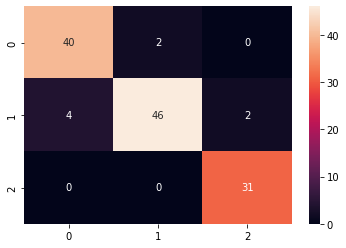

In [195]:
sns.heatmap(cf_matrix, annot=True)

#Random Forest Classifier

In [118]:
rfc_classifier = RandomForestClassifier(n_estimators=20)
rfc_classifier

RandomForestClassifier(n_estimators=20)

###train size : test size = 70% : 30%


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [120]:
print(len(X_train))
print(len(y_test))

124
54


In [121]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [122]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.29629629629629%

Confusion Matrix:

[[19  0  0]
 [ 1 20  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.91      0.95        22
           2       0.93      1.00      0.96        13

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



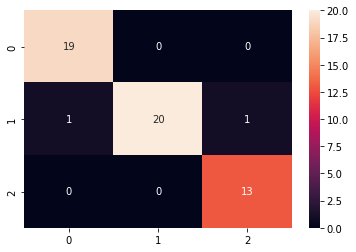

In [123]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [125]:
print(len(X_train))
print(len(y_test))

106
72


In [126]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [127]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 97.22222222222221%

Confusion Matrix:
[[22  0  0]
 [ 0 29  2]
 [ 0  0 19]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.94      0.97        31
           2       0.90      1.00      0.95        19

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72



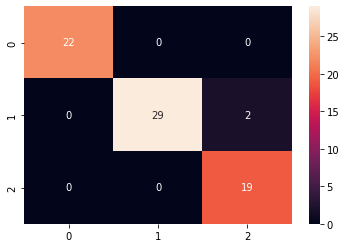

In [128]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [130]:
print(len(X_train))
print(len(y_test))

89
89


In [131]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [132]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.62921348314607%

Confusion Matrix:
[[25  0  0]
 [ 1 37  2]
 [ 0  0 24]]

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.93      0.96        40
           2       0.92      1.00      0.96        24

    accuracy                           0.97        89
   macro avg       0.96      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



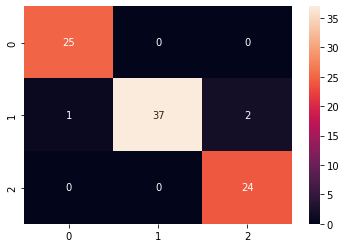

In [133]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [135]:
print(len(X_train))
print(len(y_test))

71
107


In [136]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [137]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 98.13084112149532%

Confusion Matrix:

[[34  0  0]
 [ 2 44  0]
 [ 0  0 27]]

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.96      0.98        46
           2       1.00      1.00      1.00        27

    accuracy                           0.98       107
   macro avg       0.98      0.99      0.98       107
weighted avg       0.98      0.98      0.98       107



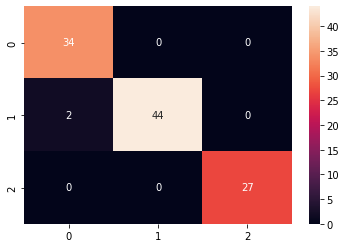

In [138]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [140]:
print(len(X_train))
print(len(y_test))

53
125


In [141]:
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [142]:
y_pred = rfc_classifier.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 95.19999999999999%

Confusion Matrix:

[[42  0  0]
 [ 2 46  4]
 [ 0  0 31]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.88      0.94        52
           2       0.89      1.00      0.94        31

    accuracy                           0.95       125
   macro avg       0.95      0.96      0.95       125
weighted avg       0.96      0.95      0.95       125



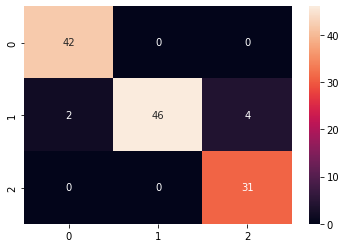

In [143]:
sns.heatmap(cf_matrix, annot=True)

#Naive Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

###train size : test size = 70% : 30%


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)    # 70% training data, 30% testing data

In [146]:
print(len(X_train))
print(len(y_test))

124
54


In [147]:
gnb.fit(X_train, y_train)

GaussianNB()

In [148]:
y_pred = gnb.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.44444444444444%

Confusion Matrix:

[[19  0  0]
 [ 2 19  1]
 [ 0  0 13]]

Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.86      0.93        22
           2       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



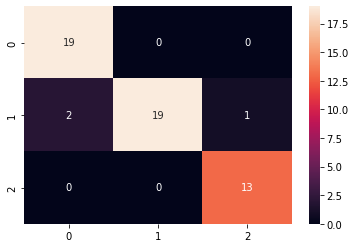

In [149]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 60% : 40%

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)    # 60% training data, 40% testing data

In [151]:
print(len(X_train))
print(len(y_test))

106
72


In [152]:
gnb.fit(X_train, y_train)

GaussianNB()

In [153]:
y_pred = gnb.predict(X_test)
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.44444444444444%

Confusion Matrix:
[[22  0  0]
 [ 2 27  2]
 [ 0  0 19]]

Classification Report:

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.87      0.93        31
           2       0.90      1.00      0.95        19

    accuracy                           0.94        72
   macro avg       0.94      0.96      0.95        72
weighted avg       0.95      0.94      0.94        72



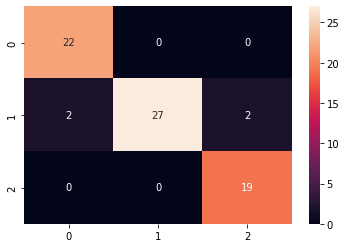

In [154]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 50% : 50%

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)    # 50% training data, 50% testing data

In [156]:
print(len(X_train))
print(len(y_test))

89
89


In [157]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [158]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 94.3820224719101%

Confusion Matrix:
[[25  0  0]
 [ 3 35  2]
 [ 0  0 24]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        25
           1       1.00      0.88      0.93        40
           2       0.92      1.00      0.96        24

    accuracy                           0.94        89
   macro avg       0.94      0.96      0.95        89
weighted avg       0.95      0.94      0.94        89



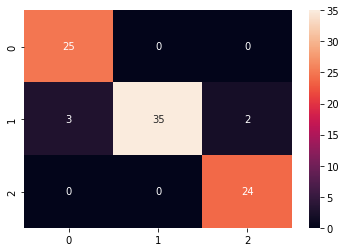

In [159]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 40% : 60%

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

In [161]:
print(len(X_train))
print(len(y_test))

71
107


In [162]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [163]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 93.45794392523365%

Confusion Matrix:

[[34  0  0]
 [ 4 39  3]
 [ 0  0 27]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       1.00      0.85      0.92        46
           2       0.90      1.00      0.95        27

    accuracy                           0.93       107
   macro avg       0.93      0.95      0.94       107
weighted avg       0.94      0.93      0.93       107



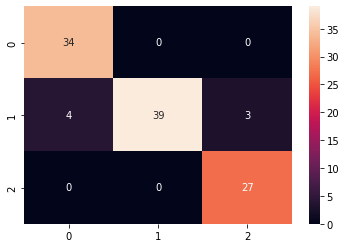

In [164]:
sns.heatmap(cf_matrix, annot=True)

###train size : test size = 30% : 70%

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

In [166]:
print(len(X_train))
print(len(y_test))

53
125


In [167]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [168]:
print(f"Accuracy: {100 * accuracy_score(y_test,y_pred)}%\n")
cf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n")
print(cf_matrix)
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 96.8%

Confusion Matrix:

[[42  0  0]
 [ 2 48  2]
 [ 0  0 31]]

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        42
           1       1.00      0.92      0.96        52
           2       0.94      1.00      0.97        31

    accuracy                           0.97       125
   macro avg       0.96      0.97      0.97       125
weighted avg       0.97      0.97      0.97       125



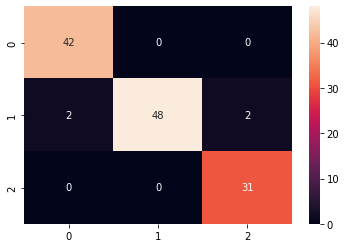

In [169]:
sns.heatmap(cf_matrix, annot=True)